In [25]:
import numpy as np
import pandas as pd

In [26]:
data1=pd.read_csv("/content/train_ctrUa4K.csv")
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Exploratary Data analysis

In [27]:
data1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
data1["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [29]:
data1.shape

(614, 13)

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
data1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
##data1['Dependents']=data1['Dependents'].fillna(data1['Dependents'].mode())

In [35]:
num_cols =data1[['Gender', 'Married', 'Dependents',
       'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']]

In [36]:
num_cols.isna().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer =SimpleImputer(missing_values =np.nan,strategy ='most_frequent')

In [39]:
imputer = imputer.fit(num_cols)

In [40]:
num_cols = imputer.transform(num_cols)

In [41]:
type(num_cols)

numpy.ndarray

In [42]:
num_cols = pd.DataFrame(num_cols,columns=['Gender', 'Married', 'Dependents',
       'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'])

In [43]:
type(num_cols)

pandas.core.frame.DataFrame

In [44]:
num_cols.isna().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [47]:
data1=data1.drop(['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'],axis=1)

In [48]:
data1.head()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP001002,Graduate,5849,0.0,Urban,Y
1,LP001003,Graduate,4583,1508.0,Rural,N
2,LP001005,Graduate,3000,0.0,Urban,Y
3,LP001006,Not Graduate,2583,2358.0,Urban,Y
4,LP001008,Graduate,6000,0.0,Urban,Y


In [49]:
data1=pd.concat([num_cols,data1],axis=1)

In [50]:
data1.isna().sum()

Gender               0
Married              0
Dependents           0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
data1.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,Male,No,0,No,120.0,360.0,1.0,LP001002,Graduate,5849,0.0,Urban,Y
1,Male,Yes,1,No,128.0,360.0,1.0,LP001003,Graduate,4583,1508.0,Rural,N
2,Male,Yes,0,Yes,66.0,360.0,1.0,LP001005,Graduate,3000,0.0,Urban,Y
3,Male,Yes,0,No,120.0,360.0,1.0,LP001006,Not Graduate,2583,2358.0,Urban,Y
4,Male,No,0,No,141.0,360.0,1.0,LP001008,Graduate,6000,0.0,Urban,Y


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Loan Amount')

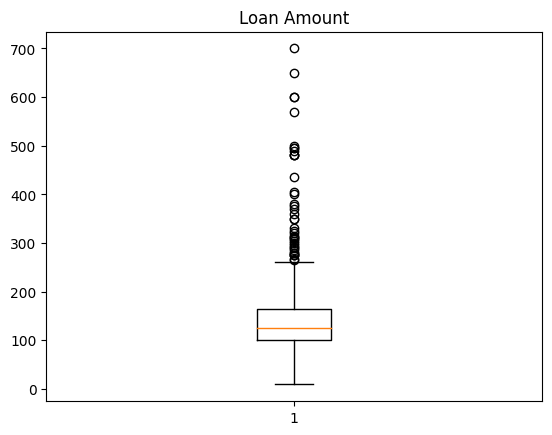

In [53]:
plt.boxplot(data1["LoanAmount"])
plt.title("Loan Amount")

In [54]:
Q1=np.percentile(data1["LoanAmount"],25)
Q1

100.25

In [55]:
Q2=np.percentile(data1["LoanAmount"],50)
Q2

125.0

In [56]:
Q3=np.percentile(data1["LoanAmount"],75)
Q3

164.75

In [57]:
IQR=Q3-Q1

In [58]:
IQR

64.5

In [59]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [60]:
low_limit

3.5

In [61]:
upr_limit

261.5

In [63]:
outlier =[]
for x in data1['LoanAmount']:
    if x>upr_limit or x<low_limit:
      outlier.append(x)

In [64]:
outlier

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [65]:
ind =data1['LoanAmount']>upr_limit
data1.loc[ind].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() ## encoding string to numerical pattern
data1['Gender'] =le.fit_transform(data1['Gender'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,No,0,No,120.0,360.0,1.0,LP001002,Graduate,5849,0.0,Urban,Y,1
1,1,Yes,1,No,128.0,360.0,1.0,LP001003,Graduate,4583,1508.0,Rural,N,1
2,1,Yes,0,Yes,66.0,360.0,1.0,LP001005,Graduate,3000,0.0,Urban,Y,1
3,1,Yes,0,No,120.0,360.0,1.0,LP001006,Not Graduate,2583,2358.0,Urban,Y,1
4,1,No,0,No,141.0,360.0,1.0,LP001008,Graduate,6000,0.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0,No,71.0,360.0,1.0,LP002978,Graduate,2900,0.0,Rural,Y,0
610,1,Yes,3+,No,40.0,180.0,1.0,LP002979,Graduate,4106,0.0,Rural,Y,1
611,1,Yes,1,No,253.0,360.0,1.0,LP002983,Graduate,8072,240.0,Urban,Y,1
612,1,Yes,2,No,187.0,360.0,1.0,LP002984,Graduate,7583,0.0,Urban,Y,1


In [70]:
data1['Married'] =le.fit_transform(data1['Married'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,0,0,No,120.0,360.0,1.0,LP001002,Graduate,5849,0.0,Urban,Y,1
1,1,1,1,No,128.0,360.0,1.0,LP001003,Graduate,4583,1508.0,Rural,N,1
2,1,1,0,Yes,66.0,360.0,1.0,LP001005,Graduate,3000,0.0,Urban,Y,1
3,1,1,0,No,120.0,360.0,1.0,LP001006,Not Graduate,2583,2358.0,Urban,Y,1
4,1,0,0,No,141.0,360.0,1.0,LP001008,Graduate,6000,0.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,No,71.0,360.0,1.0,LP002978,Graduate,2900,0.0,Rural,Y,0
610,1,1,3+,No,40.0,180.0,1.0,LP002979,Graduate,4106,0.0,Rural,Y,1
611,1,1,1,No,253.0,360.0,1.0,LP002983,Graduate,8072,240.0,Urban,Y,1
612,1,1,2,No,187.0,360.0,1.0,LP002984,Graduate,7583,0.0,Urban,Y,1


In [71]:
data1['Self_Employed'] =le.fit_transform(data1['Self_Employed'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,0,0,0,120.0,360.0,1.0,LP001002,Graduate,5849,0.0,Urban,Y,1
1,1,1,1,0,128.0,360.0,1.0,LP001003,Graduate,4583,1508.0,Rural,N,1
2,1,1,0,1,66.0,360.0,1.0,LP001005,Graduate,3000,0.0,Urban,Y,1
3,1,1,0,0,120.0,360.0,1.0,LP001006,Not Graduate,2583,2358.0,Urban,Y,1
4,1,0,0,0,141.0,360.0,1.0,LP001008,Graduate,6000,0.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,71.0,360.0,1.0,LP002978,Graduate,2900,0.0,Rural,Y,0
610,1,1,3+,0,40.0,180.0,1.0,LP002979,Graduate,4106,0.0,Rural,Y,1
611,1,1,1,0,253.0,360.0,1.0,LP002983,Graduate,8072,240.0,Urban,Y,1
612,1,1,2,0,187.0,360.0,1.0,LP002984,Graduate,7583,0.0,Urban,Y,1


In [ ]:
data1['Education'] =le.fit_transform(data1['Education'])
data1

In [73]:
data1['Property_Area'] =le.fit_transform(data1['Property_Area'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,0,0,0,120.0,360.0,1.0,LP001002,0,5849,0.0,2,Y,1
1,1,1,1,0,128.0,360.0,1.0,LP001003,0,4583,1508.0,0,N,1
2,1,1,0,1,66.0,360.0,1.0,LP001005,0,3000,0.0,2,Y,1
3,1,1,0,0,120.0,360.0,1.0,LP001006,1,2583,2358.0,2,Y,1
4,1,0,0,0,141.0,360.0,1.0,LP001008,0,6000,0.0,2,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,71.0,360.0,1.0,LP002978,0,2900,0.0,0,Y,0
610,1,1,3+,0,40.0,180.0,1.0,LP002979,0,4106,0.0,0,Y,1
611,1,1,1,0,253.0,360.0,1.0,LP002983,0,8072,240.0,2,Y,1
612,1,1,2,0,187.0,360.0,1.0,LP002984,0,7583,0.0,2,Y,1


In [74]:
data1=data1.drop("Loan_ID",axis=1)

In [83]:
data1['Dependents'] =le.fit_transform(data1['Dependents'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,0,0,0,120.0,360.0,1.0,0,5849,0.0,2,1,1
1,1,1,1,0,128.0,360.0,1.0,0,4583,1508.0,0,0,1
2,1,1,0,1,66.0,360.0,1.0,0,3000,0.0,2,1,1
3,1,1,0,0,120.0,360.0,1.0,1,2583,2358.0,2,1,1
4,1,0,0,0,141.0,360.0,1.0,0,6000,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,71.0,360.0,1.0,0,2900,0.0,0,1,0
610,1,1,3,0,40.0,180.0,1.0,0,4106,0.0,0,1,1
611,1,1,1,0,253.0,360.0,1.0,0,8072,240.0,2,1,1
612,1,1,2,0,187.0,360.0,1.0,0,7583,0.0,2,1,1


In [75]:
data1['Loan_Status'] =le.fit_transform(data1['Loan_Status'])
data1

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender\t
0,1,0,0,0,120.0,360.0,1.0,0,5849,0.0,2,1,1
1,1,1,1,0,128.0,360.0,1.0,0,4583,1508.0,0,0,1
2,1,1,0,1,66.0,360.0,1.0,0,3000,0.0,2,1,1
3,1,1,0,0,120.0,360.0,1.0,1,2583,2358.0,2,1,1
4,1,0,0,0,141.0,360.0,1.0,0,6000,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,71.0,360.0,1.0,0,2900,0.0,0,1,0
610,1,1,3+,0,40.0,180.0,1.0,0,4106,0.0,0,1,1
611,1,1,1,0,253.0,360.0,1.0,0,8072,240.0,2,1,1
612,1,1,2,0,187.0,360.0,1.0,0,7583,0.0,2,1,1


In [84]:
corr_matrix =data1.corr()

<ipython-input-84-0a0b850dd1b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =data1.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


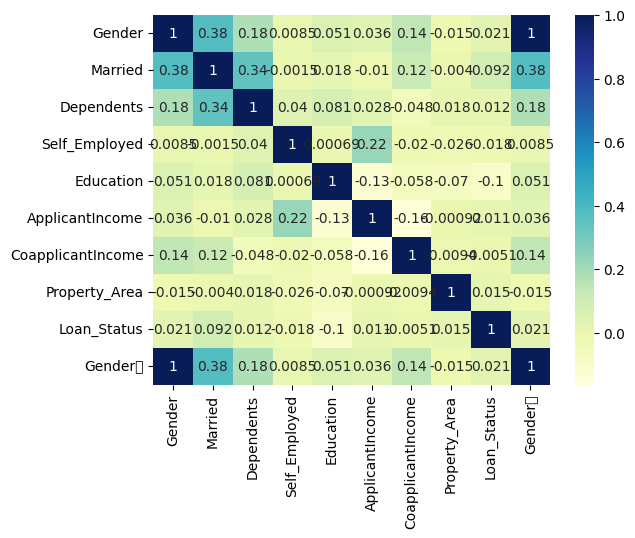

In [85]:
sns.heatmap(corr_matrix,annot =True,cmap = 'YlGnBu')
plt.show()

In [86]:
x=data1.drop(["Loan_Status"],axis=1)

In [87]:
y=data1["Loan_Status"]

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [129]:
type(x)

numpy.ndarray

In [130]:
x=pd.DataFrame(x)

In [131]:
type(x)

pandas.core.frame.DataFrame

In [132]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.813264,0.645724,0.235020,0.127400,0.474806,0.706001,0.853403,0.232112,0.115391,0.043702,0.520070,0.813264
std,0.390040,0.478711,0.327203,0.333711,0.184884,0.138582,0.354013,0.422549,0.093567,0.069411,0.392275,0.390040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.362550,0.743590,1.000000,0.000000,0.067159,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.442231,0.743590,1.000000,0.000000,0.090802,0.035760,0.500000,1.000000
75%,1.000000,1.000000,0.333333,0.000000,0.581673,0.743590,1.000000,0.000000,0.130779,0.065697,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000)
model =lr.fit(x_train,y_train)

In [135]:
y_predictions=model.predict(x_test)
y_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [137]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [138]:
confusion_matrix(y_test,y_predictions)

array([[22, 22],
       [ 1, 99]])

In [139]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average=None))
print("Recall=",recall_score(y_test,y_predictions,average=None))
print("F1 Score=",f1_score(y_test,y_predictions,average=None))

Accuracy= 0.8402777777777778
Precision= [0.95652174 0.81818182]
Recall= [0.5  0.99]
F1 Score= [0.65671642 0.8959276 ]


# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
metric_k=[]
neighbors =np.arange(3,15)

In [142]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [143]:
metric_k

[0.7708333333333334,
 0.7361111111111112,
 0.7777777777777778,
 0.7361111111111112,
 0.7847222222222222,
 0.7569444444444444,
 0.8125,
 0.8194444444444444,
 0.8194444444444444,
 0.7916666666666666,
 0.8263888888888888,
 0.8194444444444444]

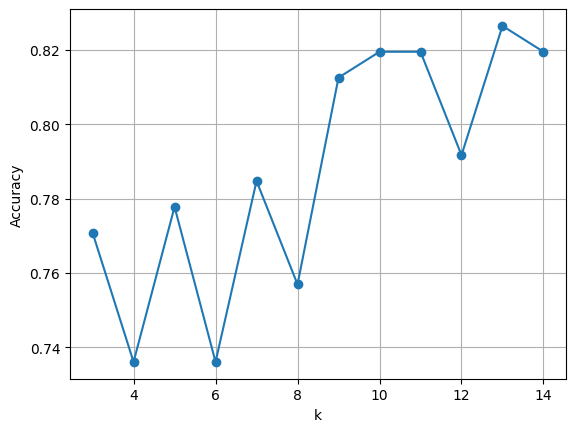

In [144]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()

In [145]:
classifier =KNeighborsClassifier(n_neighbors=5,metric="euclidean")
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [146]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average=None))
print("Recall=",recall_score(y_test,y_predictions,average=None))
print("F1 Score=",f1_score(y_test,y_predictions,average=None))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7777777777777778
Precision= [0.7        0.79824561]
Recall= [0.47727273 0.91      ]
F1 Score= [0.56756757 0.85046729]


array([[21, 23],
       [ 9, 91]])

SVC

In [147]:
from sklearn.svm import SVC
svmclf = SVC(kernel= 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [148]:
y_pred=svmclf.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.8402777777777778


Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [151]:
y_pred=dt_clf.predict(x_test)

In [152]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7291666666666666


In [153]:
print(confusion_matrix(y_test,y_pred))

[[27 17]
 [22 78]]


Random **Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
y_pred=rf_clf.predict(x_test)

In [111]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.8173913043478261


Tuning

In [117]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion="entropy",min_samples_split=3)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [157]:
random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [158]:
rf = RandomForestClassifier()

In [160]:
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [161]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'log_loss'}

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['log_loss'], 'max_depth': [340], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}
